# Neural Network for Binary Classification

### Determines if patient had an onset of diabetes within five years
- Using Pima Indians dataset downloaded from [here](https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv)
- All input variables that describe each patient are numerical and have been transformed

### Input Variables (X)
1. Number of times pregnant
2. Plasma glucose concentration at 2 hours in an oral glucose tolerance test
3. Diastolic blood pressure (mm Hg)
4. Triceps skin fold thickness (mm)
5. 2-hour serum insulin (μIU/ml)
6. Body mass index (weight in kg/(height in m)2)
7. Diabetes pedigree function
8. Age (years)

### Output Variables (Y):
- Class label (0 or 1)

In [17]:
import torch
import numpy as np
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split

In [18]:
# load the dataset, split into input (X) and output (y) variables
dataset = np.loadtxt('pima-indians-diabetes.csv', delimiter=',')
X = dataset[:,0:8]
Y = dataset[:,8]

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42)

In [20]:
X_test.shape

(154, 8)

In [21]:
X_train = torch.tensor(X_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
Y_train = torch.tensor(Y_train, dtype=torch.float32).reshape(-1,1)
Y_test = torch.tensor(Y_test, dtype=torch.float32).reshape(-1,1)

In [22]:
X_test.shape

torch.Size([154, 8])

In [23]:
# model = nn.Sequential(
#     nn.Linear(8, 12),
#     nn.ReLU(),
#     nn.Linear(12,8),
#     nn.ReLU(),
#     nn.Linear(8,1),
#     nn.Sigmoid()
# )

In [24]:
# print(model)

In [25]:
class PimaClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden1 = nn.Linear(8,12)
        self.act1 = nn.ReLU()
        self.hidden2 = nn.Linear(12,8)
        self.act2 = nn.ReLU()
        self.output = nn.Linear(8,1)
        self.act_output = nn.Sigmoid()
        
    def forward(self, x):
        x = self.act1(self.hidden1(x))
        x = self.act2(self.hidden2(x))
        x = self.act_output(self.output(x))
        return x
    
model = PimaClassifier()
print(model)

PimaClassifier(
  (hidden1): Linear(in_features=8, out_features=12, bias=True)
  (act1): ReLU()
  (hidden2): Linear(in_features=12, out_features=8, bias=True)
  (act2): ReLU()
  (output): Linear(in_features=8, out_features=1, bias=True)
  (act_output): Sigmoid()
)


In [26]:
loss_fn = nn.BCELoss() # binary cross entropy
optimizer = optim.Adam(model.parameters(), lr=0.0001)

In [27]:
n_epochs = 1000
batch_size = 10
epoch_losses = [] # store average loss per epoch
for epoch in range(1,n_epochs+1):
    batch_losses = [] # store loss for each
    for i in range(0,len(X_train), batch_size):
        Xbatch = X_train[i:i+batch_size]
        y_pred = model(Xbatch)
        ybatch = Y_train[i:i+batch_size]
        loss = loss_fn(y_pred, ybatch)
        
        batch_losses.append(loss.item())
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    epoch_loss = sum(batch_losses) / len(batch_losses) # Calculate average loss for this epoch
    epoch_losses.append(epoch_loss)
        
    if epoch%100 == 0:
        print(f'Finished epoch {epoch}, latest loss {loss}')

Finished epoch 100, latest loss 0.5586108565330505
Finished epoch 200, latest loss 0.3932972550392151
Finished epoch 300, latest loss 0.25635620951652527
Finished epoch 400, latest loss 0.2049255669116974
Finished epoch 500, latest loss 0.17954760789871216
Finished epoch 600, latest loss 0.1609944999217987
Finished epoch 700, latest loss 0.14911355078220367
Finished epoch 800, latest loss 0.1395576447248459
Finished epoch 900, latest loss 0.13003867864608765
Finished epoch 1000, latest loss 0.12320232391357422


In [28]:
# compute accuracy (no_grad is optional)
y_pred = model(X_test)    
accuracy = (y_pred.round() == Y_test).float().mean()
print(f"Accuracy {accuracy}")

Accuracy 0.7467532753944397


In [29]:
predictions = (model(X_test) > 0.5).int()
for i in range(5):
    print('%s => %d (expected %d)' % (X_test[i].tolist(), predictions[i], Y_test[i]))

[6.0, 98.0, 58.0, 33.0, 190.0, 34.0, 0.4300000071525574, 43.0] => 1 (expected 0)
[2.0, 112.0, 75.0, 32.0, 0.0, 35.70000076293945, 0.14800000190734863, 21.0] => 0 (expected 0)
[2.0, 108.0, 64.0, 0.0, 0.0, 30.799999237060547, 0.15800000727176666, 21.0] => 0 (expected 0)
[8.0, 107.0, 80.0, 0.0, 0.0, 24.600000381469727, 0.8560000061988831, 34.0] => 0 (expected 0)
[7.0, 136.0, 90.0, 0.0, 0.0, 29.899999618530273, 0.20999999344348907, 50.0] => 1 (expected 0)


<function matplotlib.pyplot.show(close=None, block=None)>

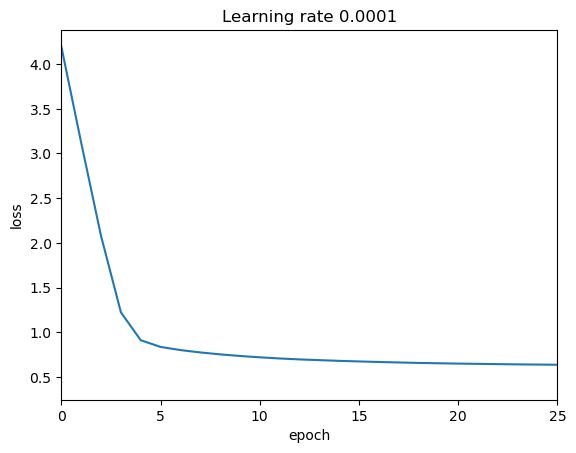

In [34]:
import matplotlib.pyplot as plt
learning_rate = 0.001

plt.plot(epoch_losses)
plt.ylabel('loss')
plt.xlabel('epoch')
plt.title("Learning rate 0.0001")
plt.xlim(0, 25)
plt.show